In [1]:
from src.utils import get_mapping_dict
from analysis import get_latent, draw_distribution, embedding_pipeline

# attack densenet121

In [2]:
model_from_list = ["resnet18", "densenet121"]
model_to = "densenet121"
attack_mode_list = ["fgsm_un", "pgd_un", "mifgsm_un", "deepfool", "pgd_ta"]
layer_list = ["last"]
device = "cuda"
mapping_folder_to_name, mapping_folder_to_label, mapping_name_to_label, mapping_label_to_name = get_mapping_dict()

======== MODEL FROM resnet18 TO densenet121 ========
------ ATTACK MODE fgsm_un ------


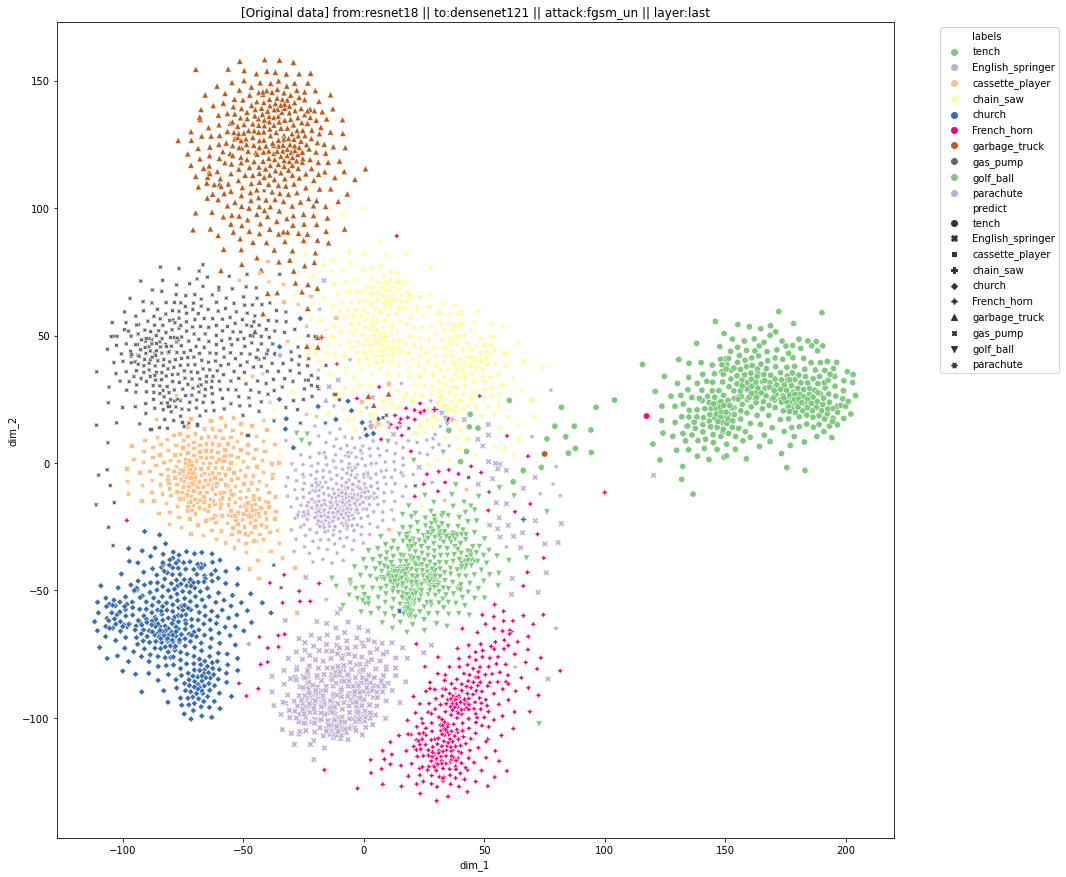

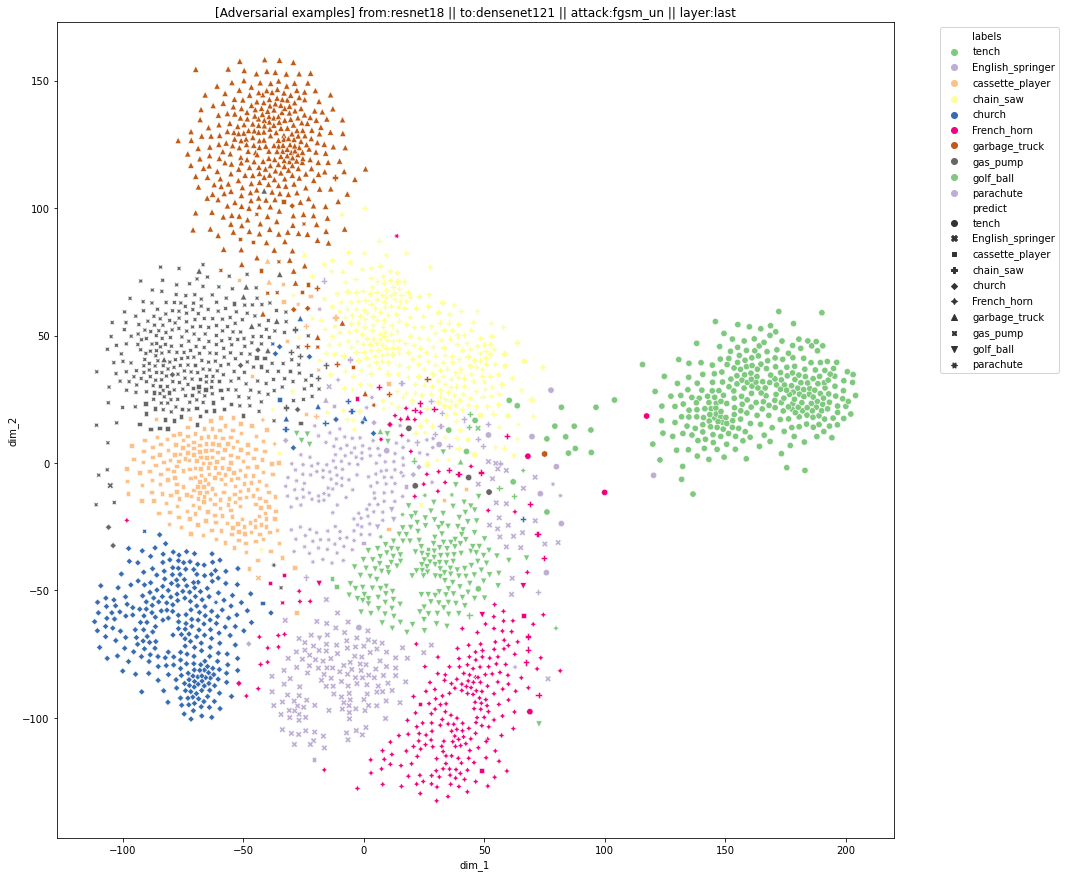

------ ATTACK MODE pgd_un ------


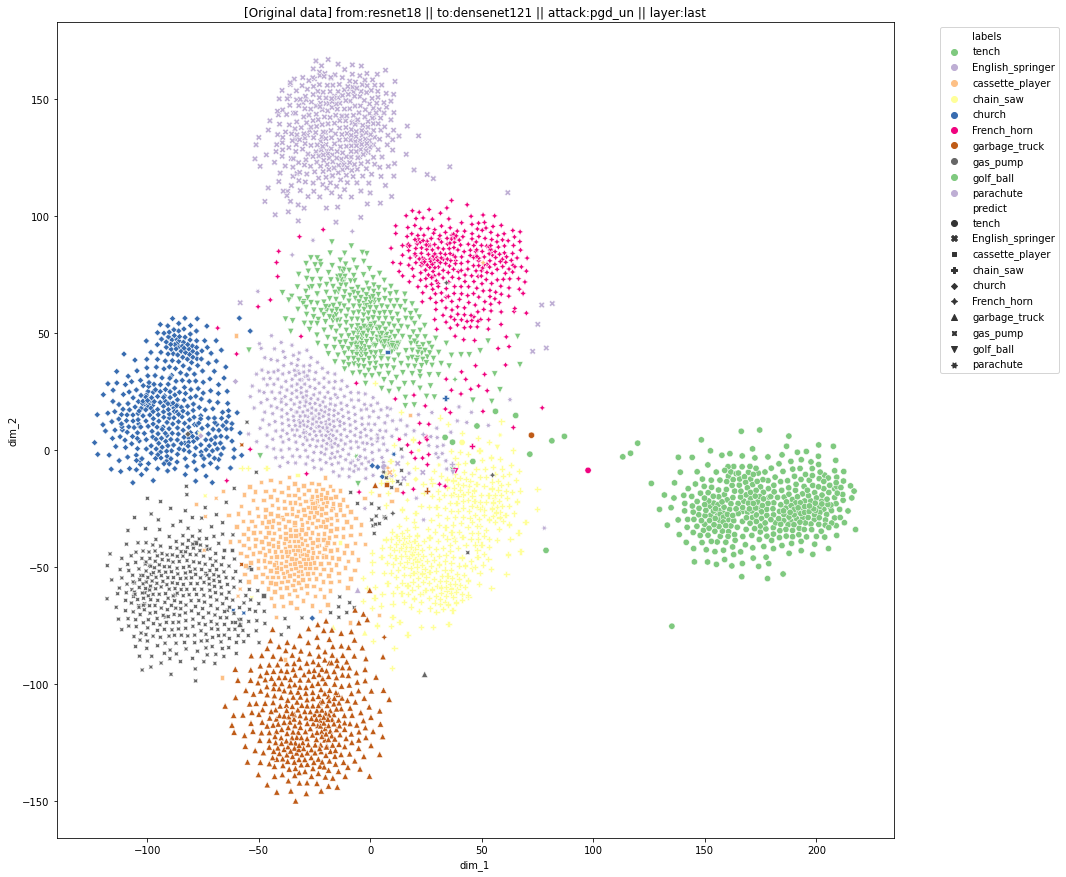

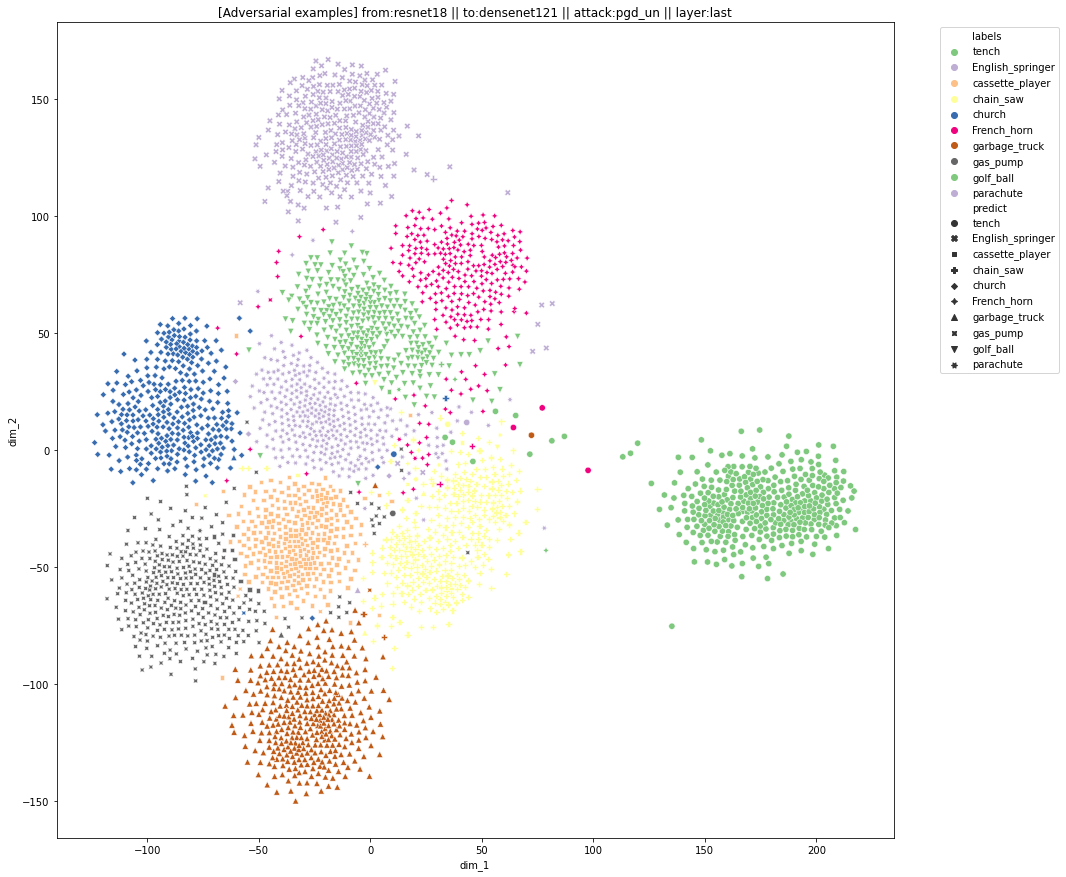

------ ATTACK MODE mifgsm_un ------


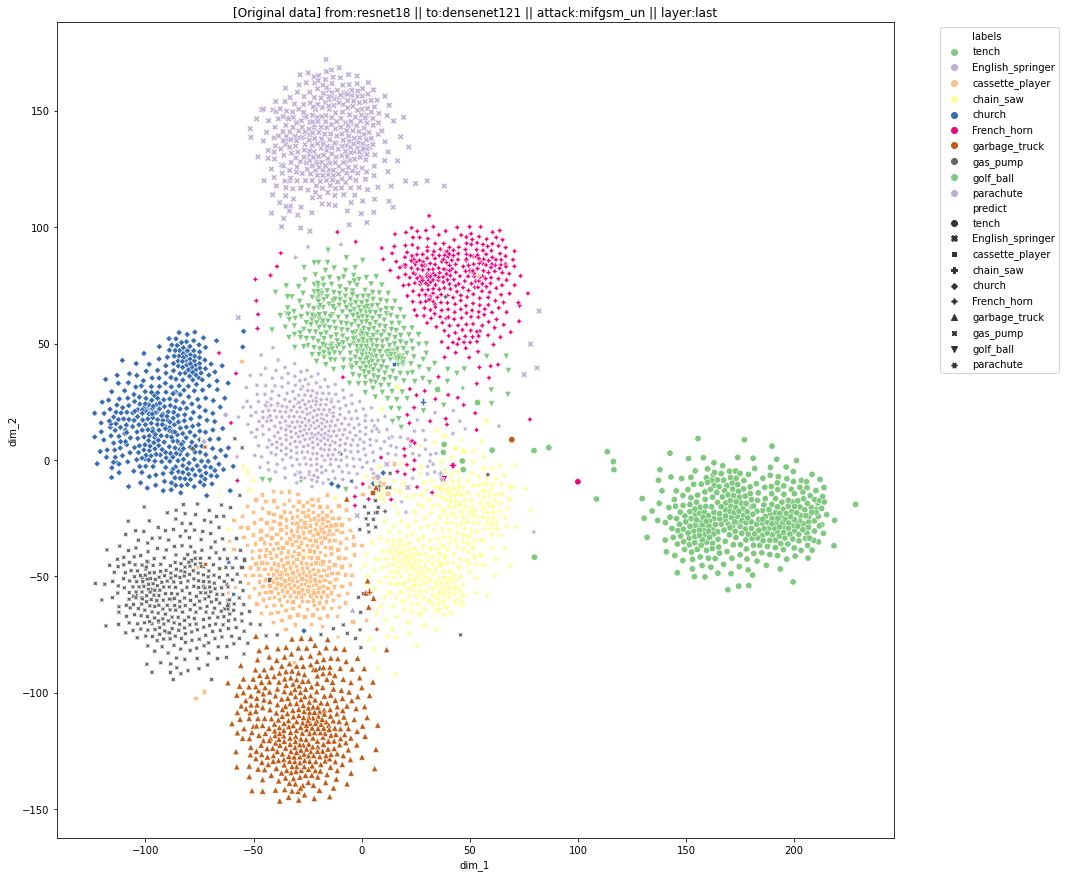

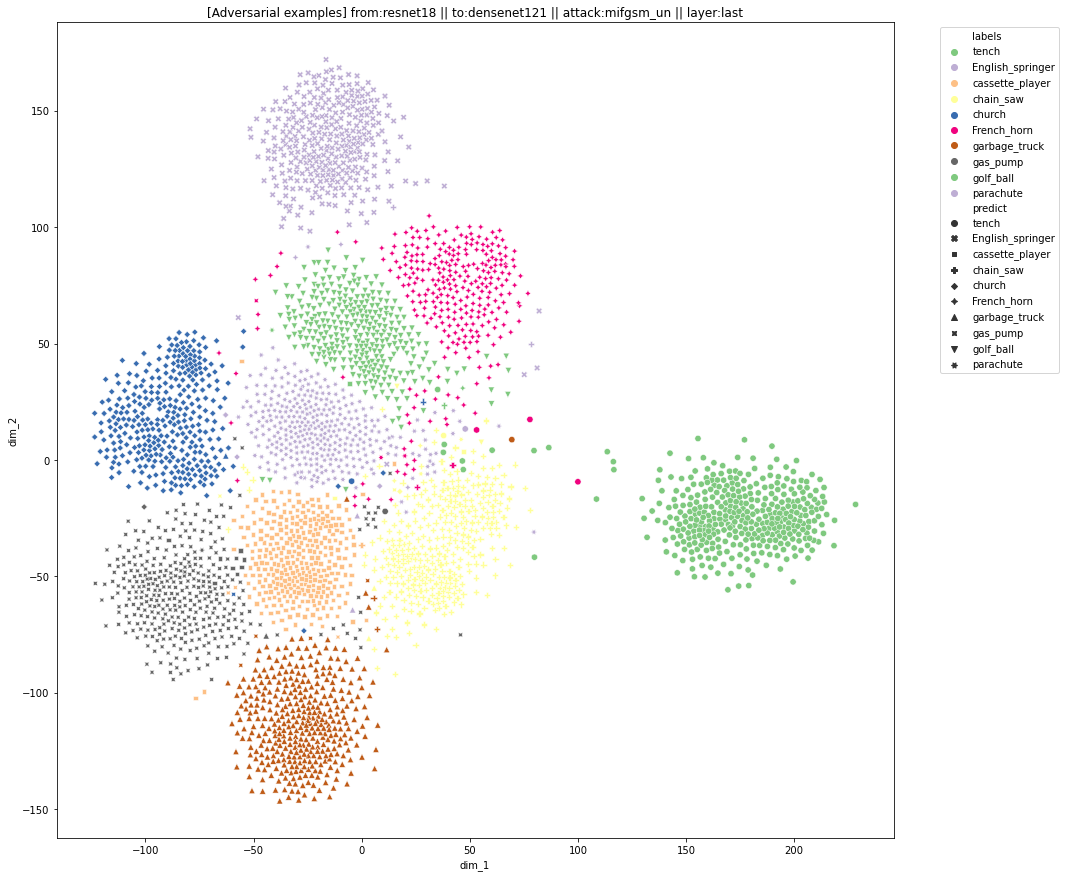

------ ATTACK MODE deepfool ------


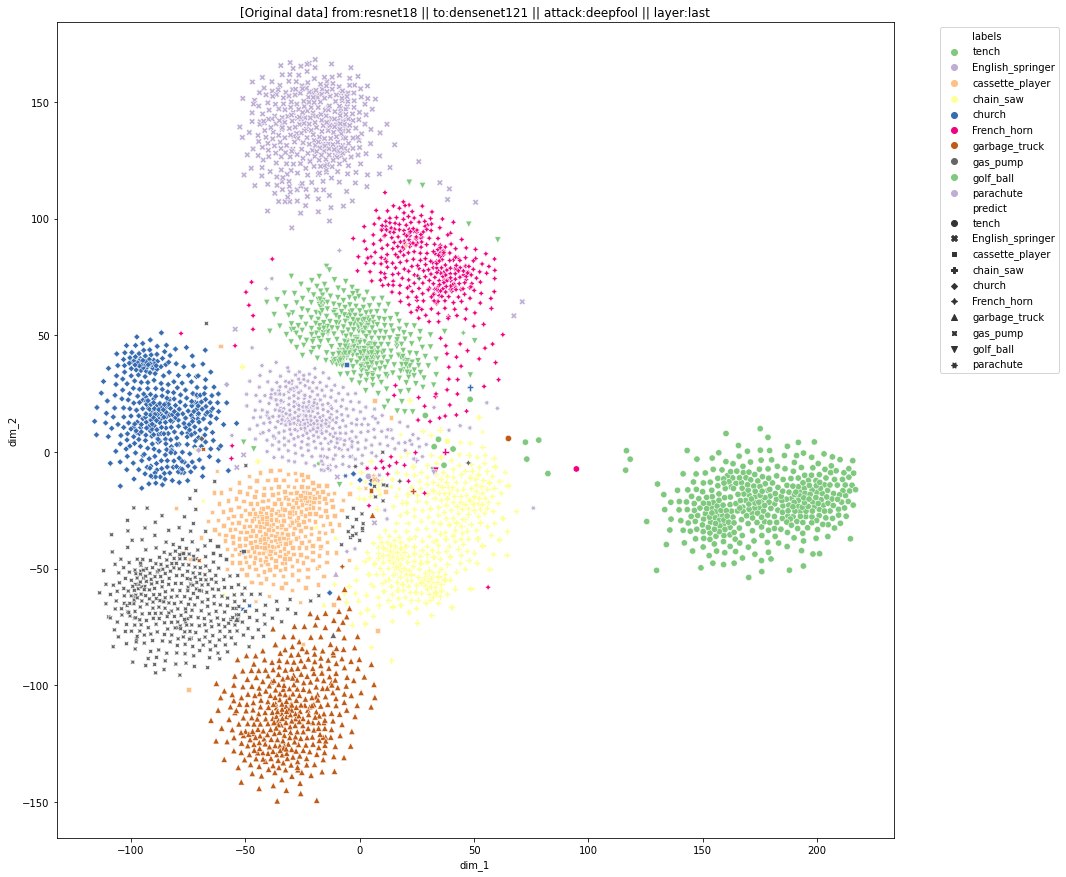

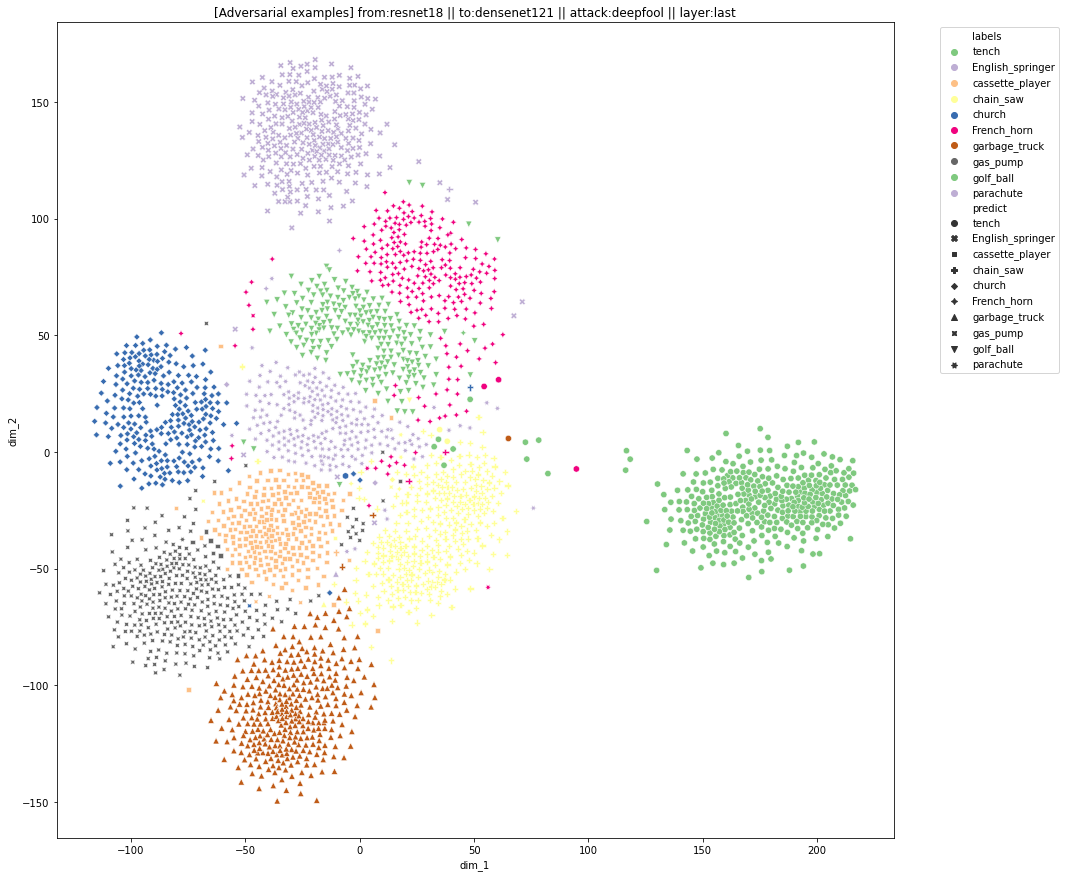

------ ATTACK MODE pgd_ta ------


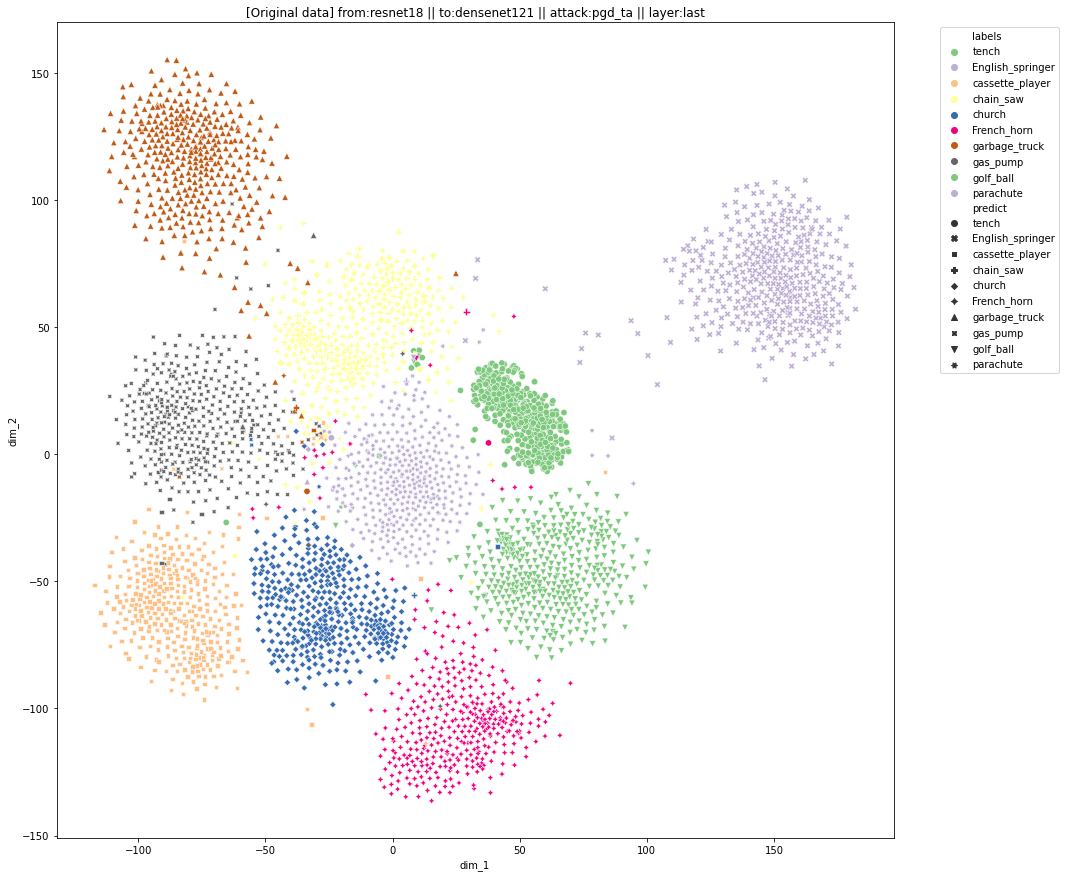

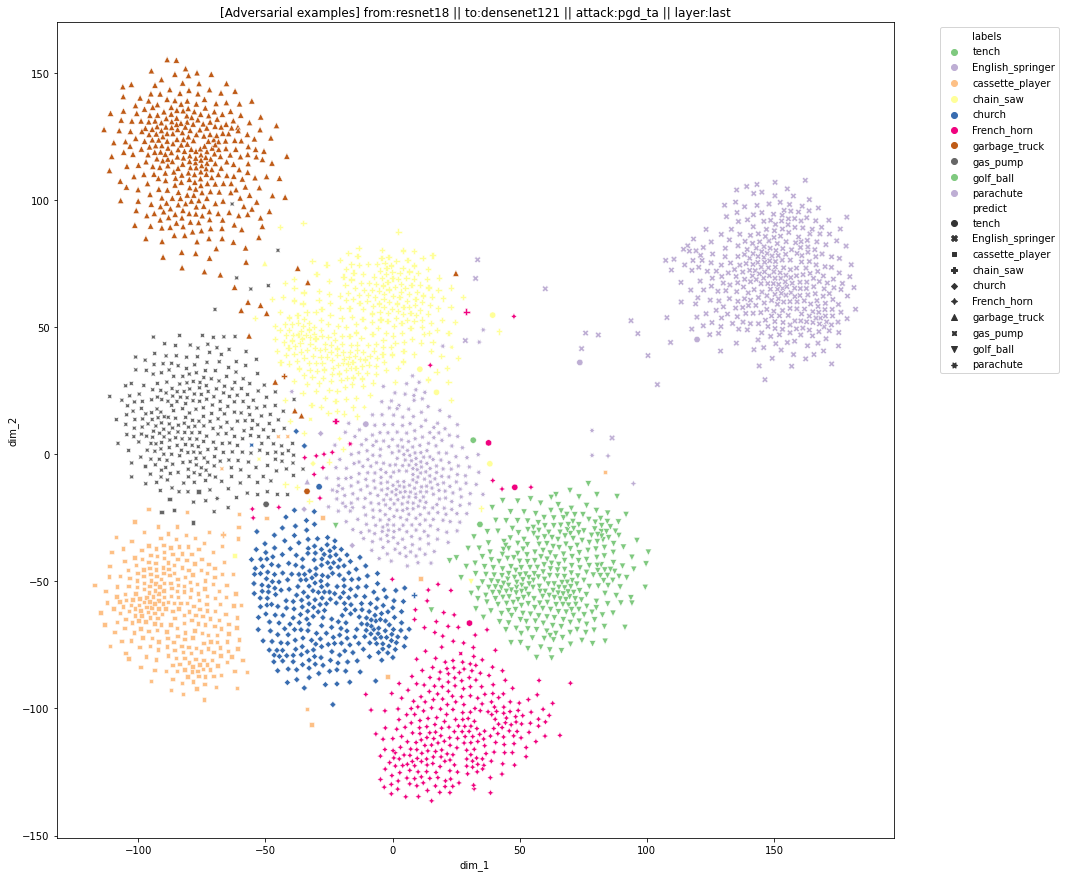

======== MODEL FROM densenet121 TO densenet121 ========
------ ATTACK MODE fgsm_un ------


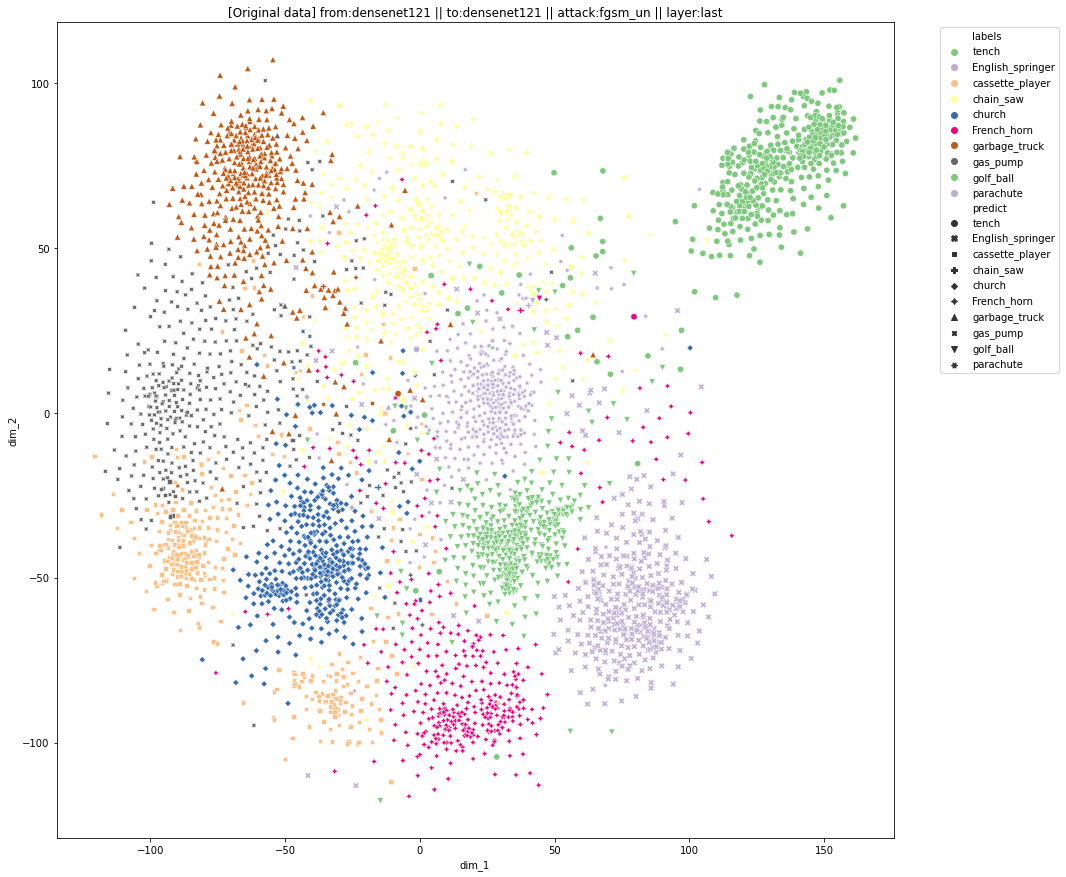

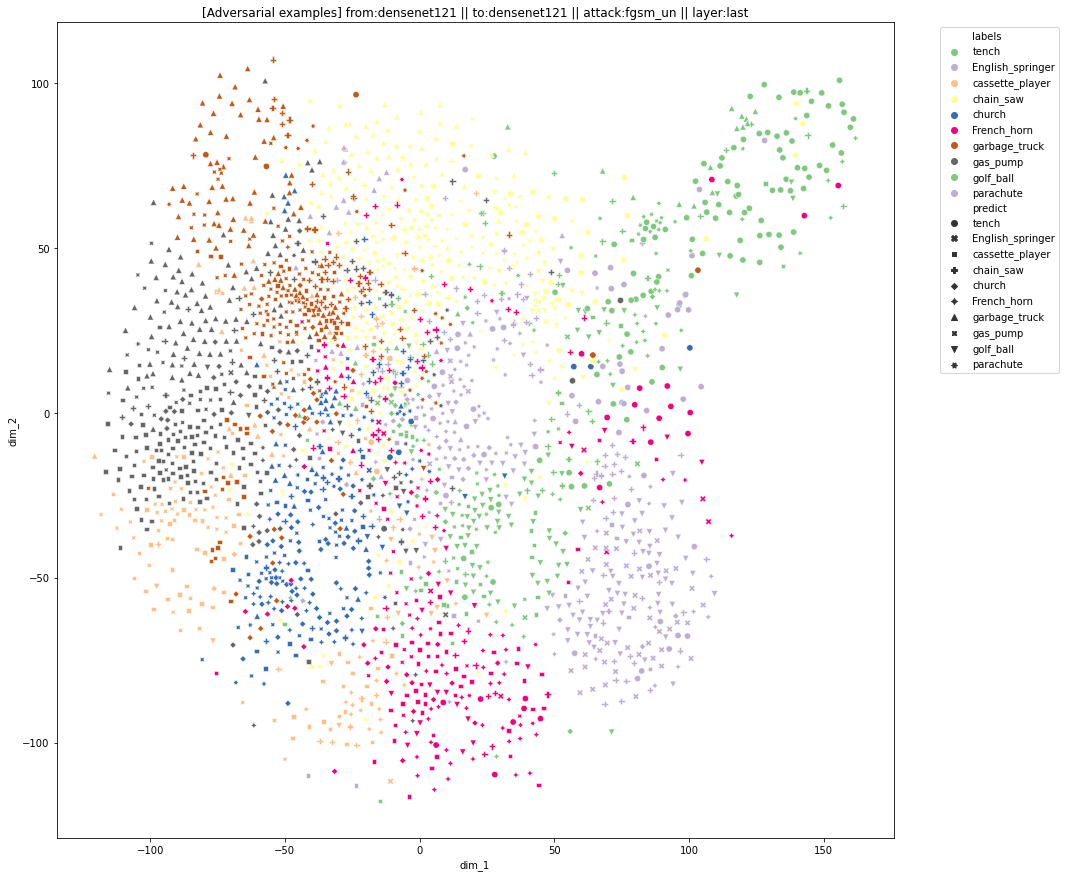

------ ATTACK MODE pgd_un ------


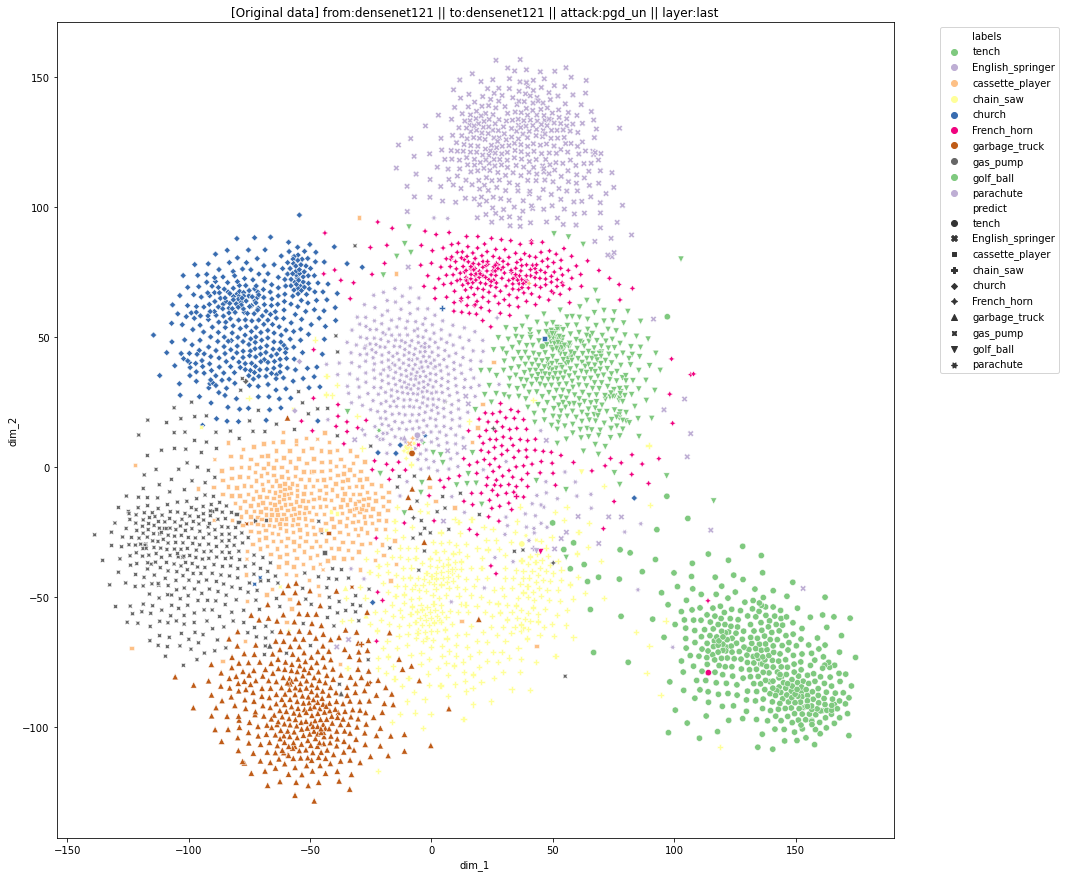

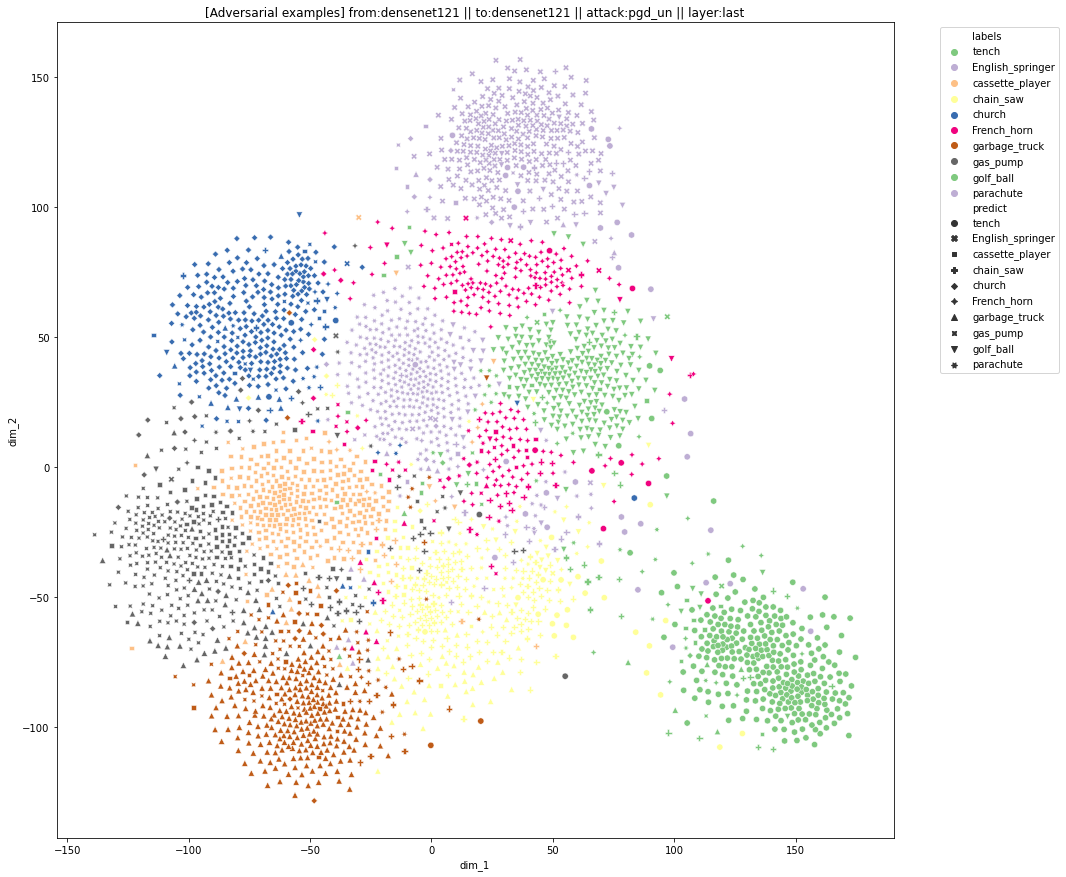

------ ATTACK MODE mifgsm_un ------


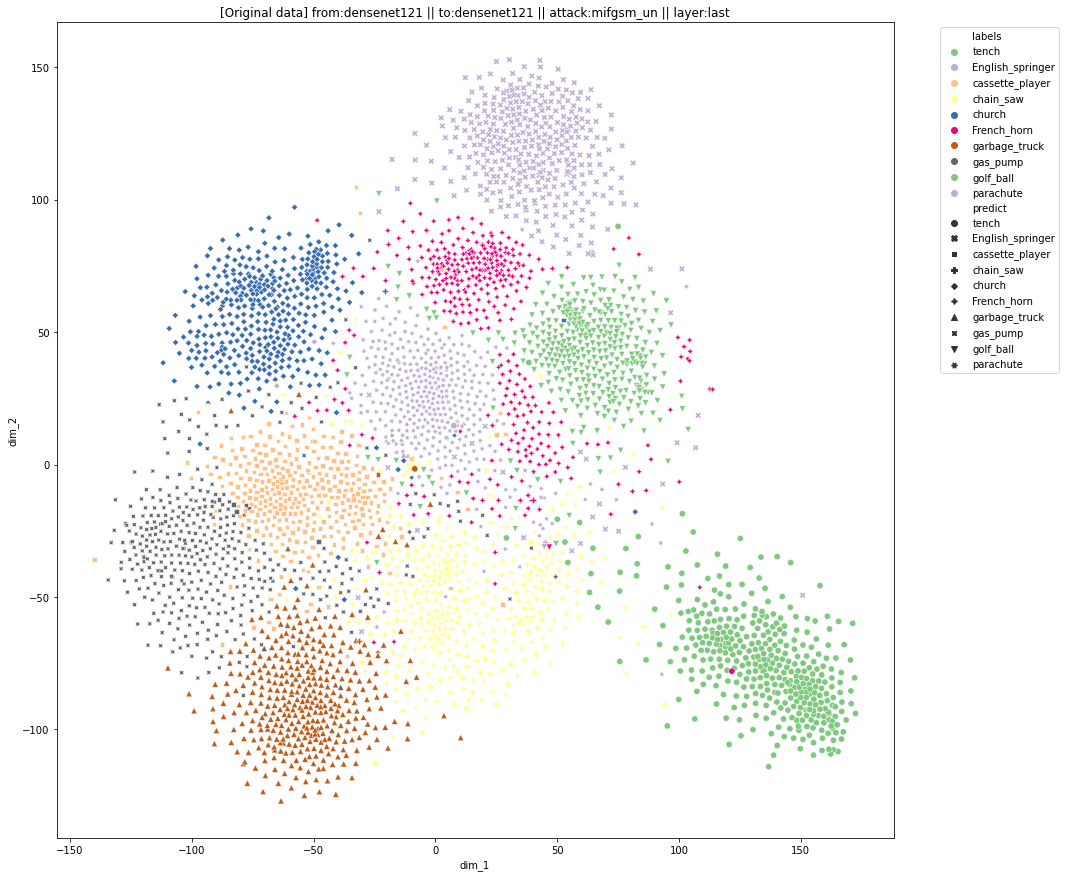

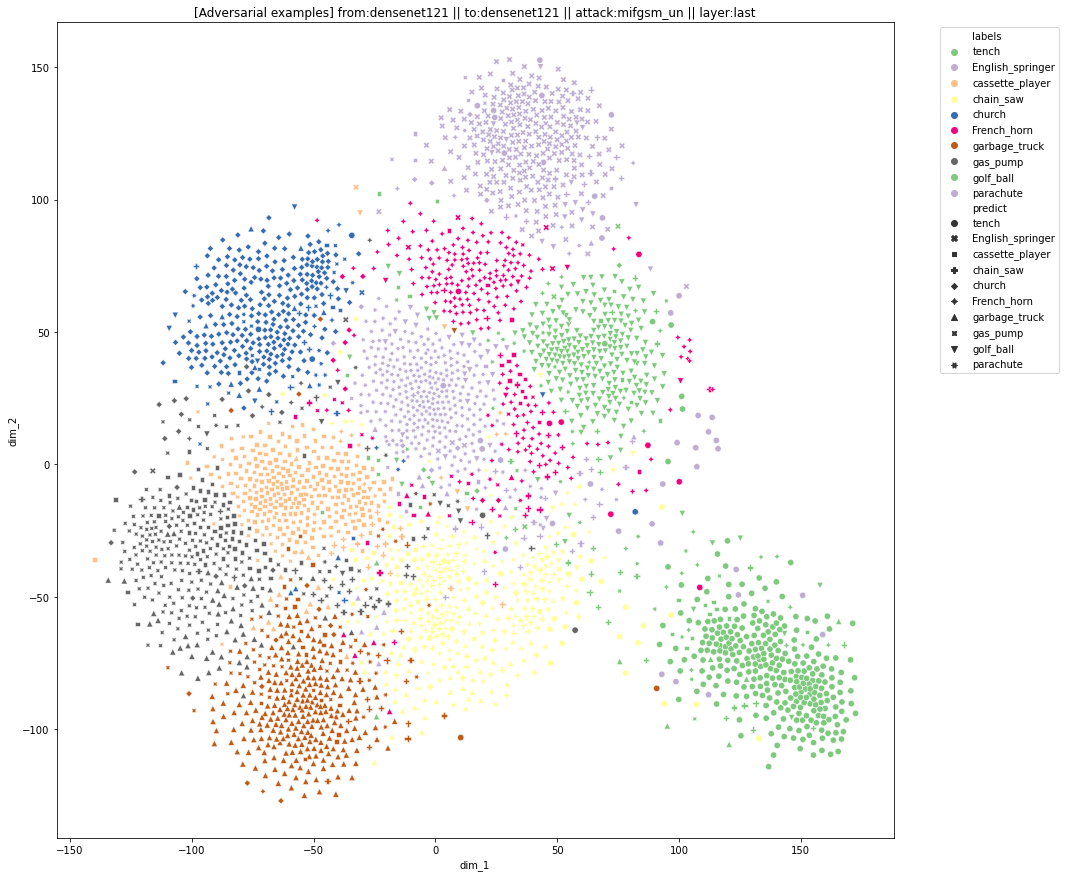

------ ATTACK MODE deepfool ------


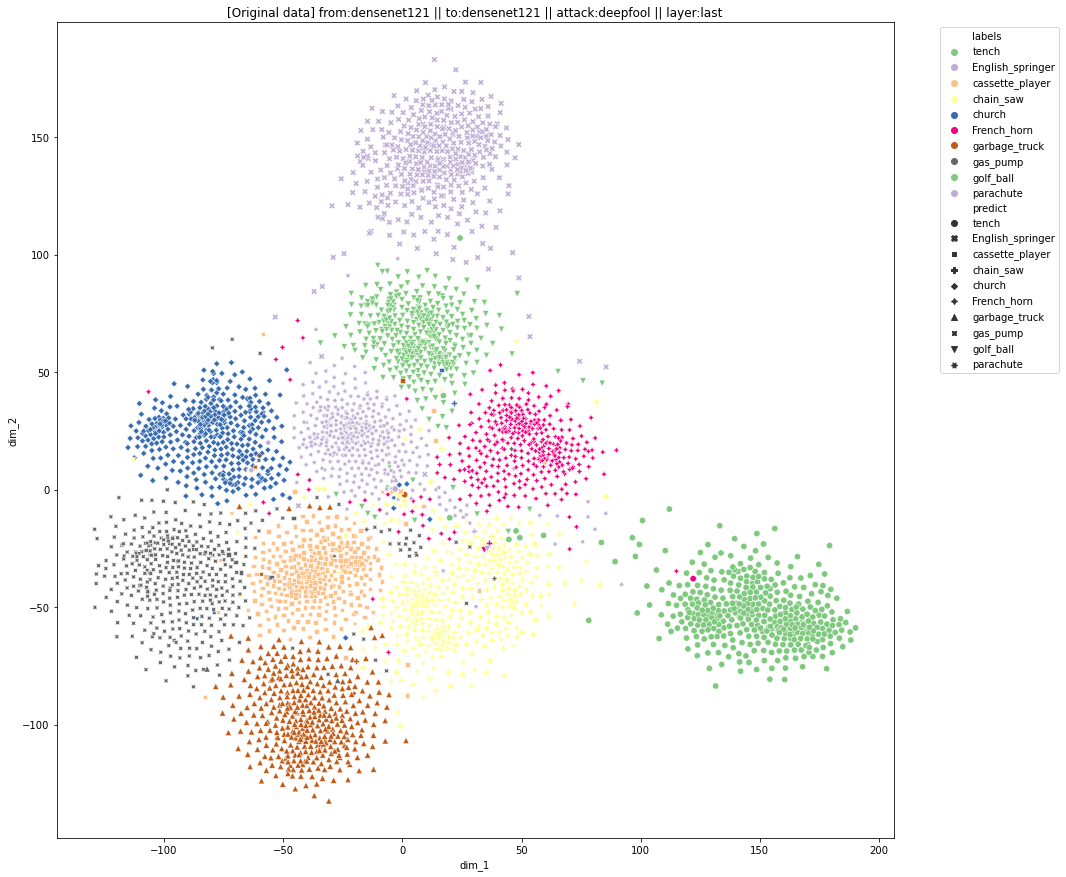

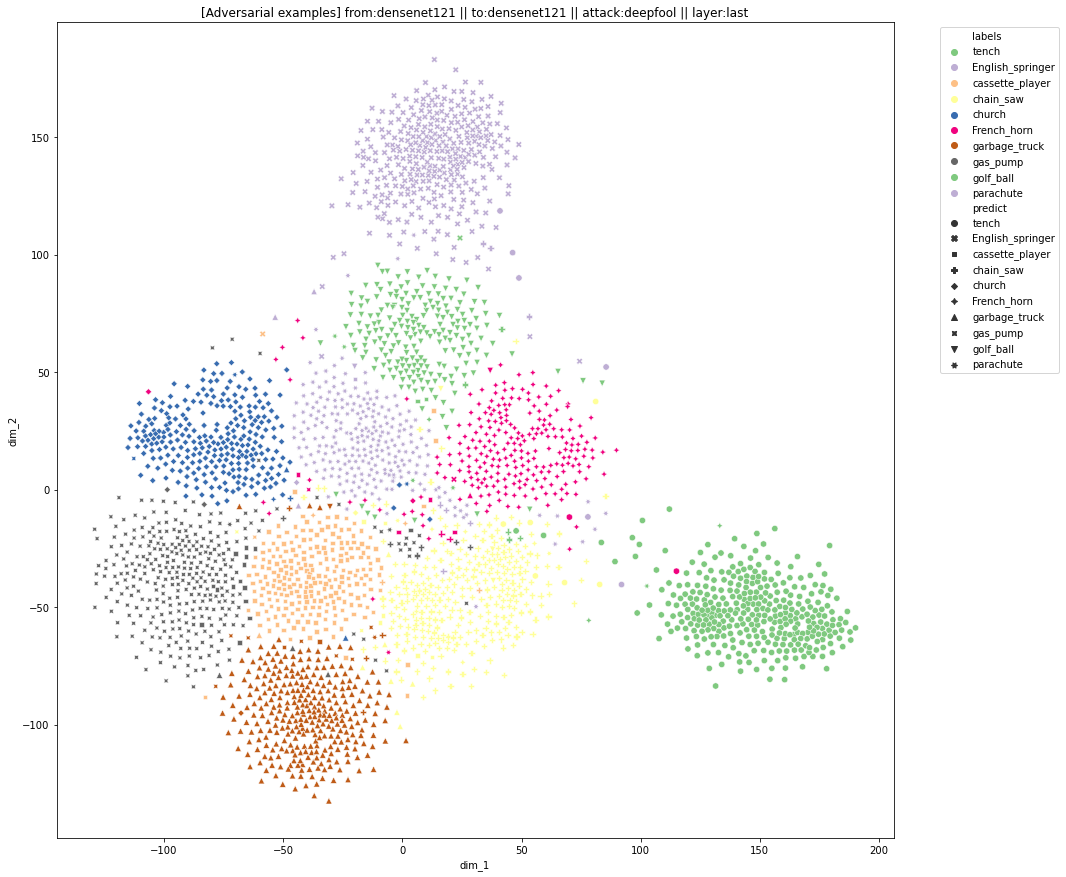

------ ATTACK MODE pgd_ta ------


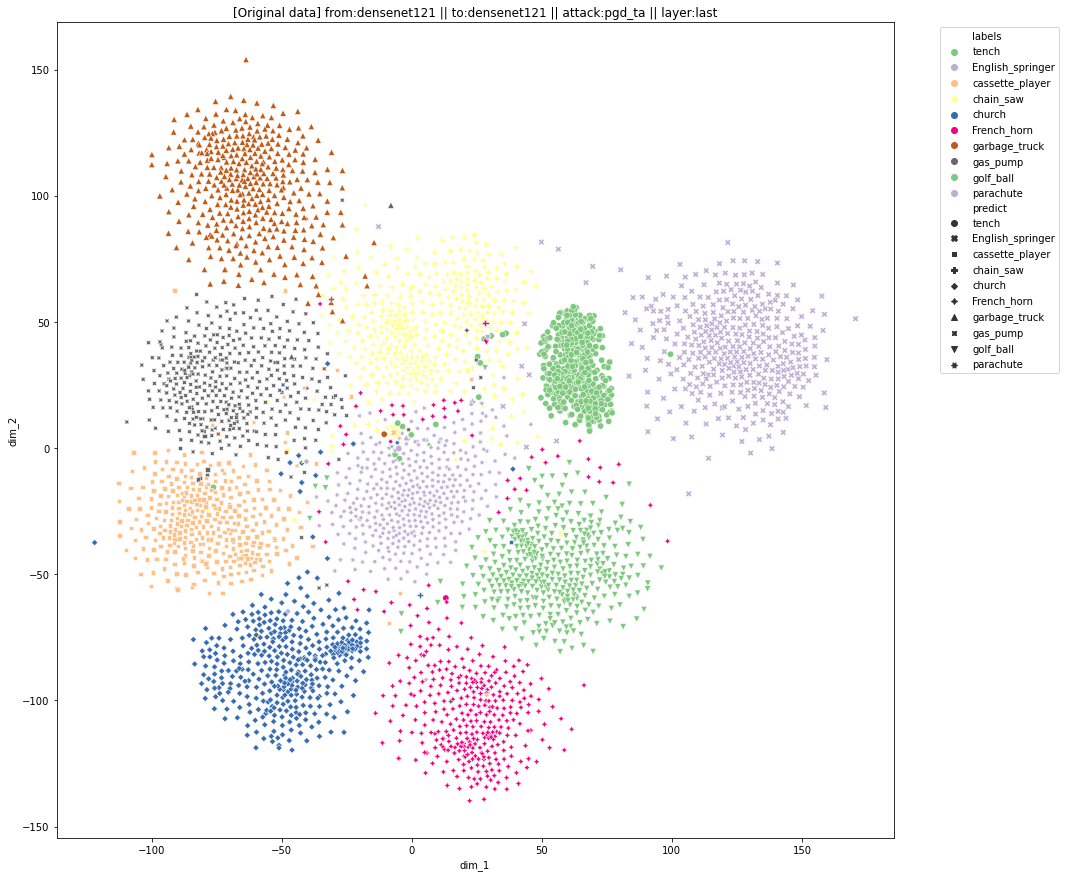

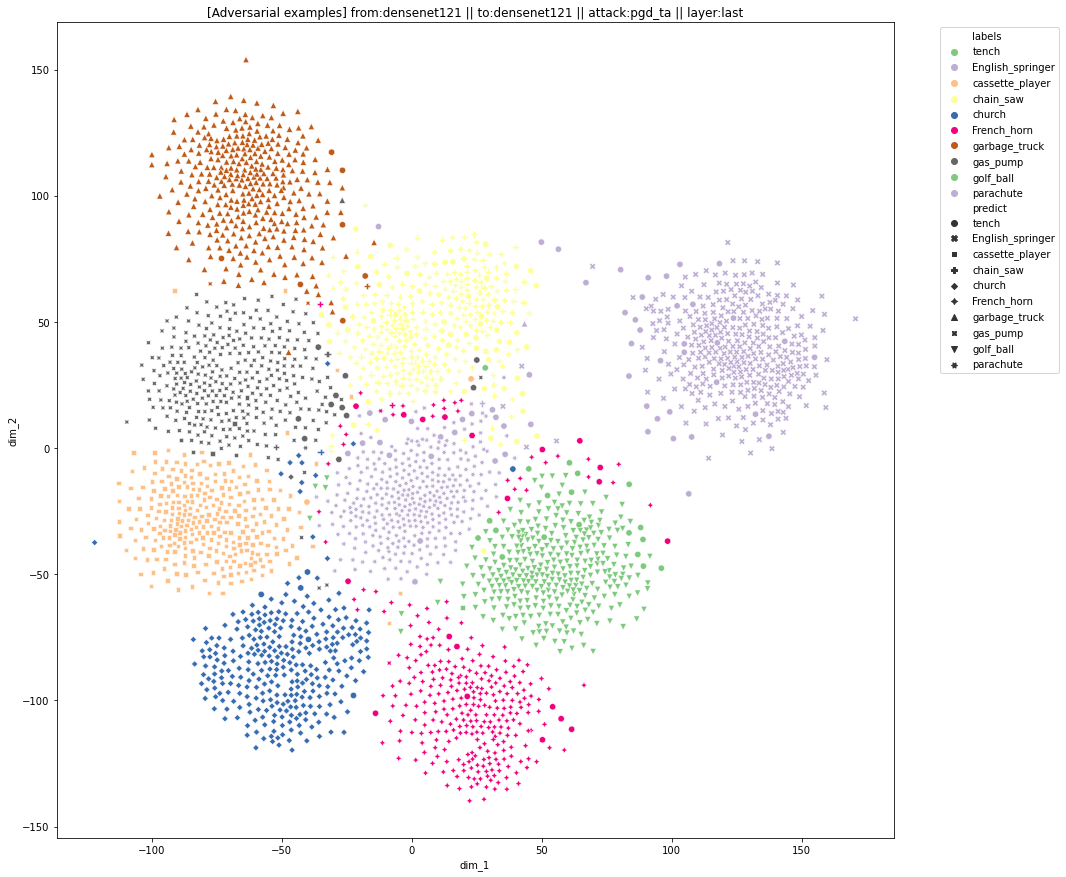

In [3]:
for model_from in model_from_list:
    print(f"======== MODEL FROM {model_from} TO {model_to} ========")
    for attack_mode in attack_mode_list:
        print(f"------ ATTACK MODE {attack_mode} ------")
        for layer in layer_list:
            embedding_all, label_all, predict_all, ori_or_adv = embedding_pipeline(model_from, model_to, attack_mode, device, layer, mapping_folder_to_label)
            latent_embedded = get_latent(embedding_all)
            draw_distribution(latent_embedded, label_all, predict_all, ori_or_adv, mapping_label_to_name, title=f" from:{model_from} || to:{model_to} || attack:{attack_mode} || layer:{layer}")